# Import Libraries

In [1]:
# install Anaconda, and pandas, numpy, sklearn and matplotlib will come pre-installed
# otherwise install it with pip, e.g. pip install pandas
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os

# Load file from your directory

In [2]:
!pwd
# where you saved your file, train.csv, probably /Downloads

/Users/gc/Desktop/titanic_workshop_code


In [3]:
os.chdir('/Users/gc/Desktop/titanic_workshop_code')

In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Mean Survival Rate
* 1 -> survived
* 0 -> not survived

In [5]:
np.mean(df.Survived)

0.3838383838383838

# Probability of being in class 1; class 2; class 3

In [6]:
pclass_df = df.groupby('Pclass').size()

In [7]:
pclass_df

Pclass
1    216
2    184
3    491
dtype: int64

In [8]:
pclass_df/pclass_df.sum()

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [9]:
df.groupby(['Survived', 'Pclass']).count().PassengerId

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

# Survival rate by Class

In [10]:
print('Survival Rate of Class 1: ', round(136/(80+136),2))
print('Survival Rate of Class 2: ', round(87/(97+87),2))
print('Survival Rate of Class 3: ', round(119/(372+119),2))

Survival Rate of Class 1:  0.63
Survival Rate of Class 2:  0.47
Survival Rate of Class 3:  0.24


# Descriptive Statistics

In [11]:
df.describe().Age['mean']

29.69911764705882

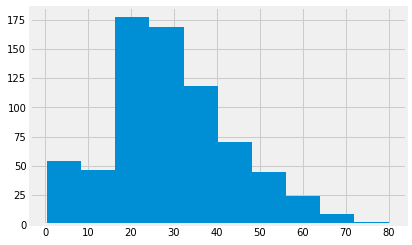

In [12]:
plt.hist(df['Age'].dropna()); # drop any NA values for visualization

In [13]:
df.describe().Fare['mean']

32.2042079685746

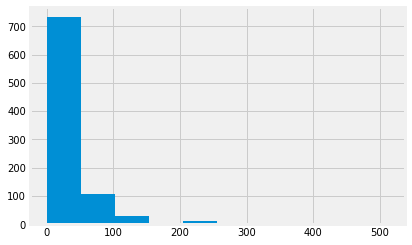

In [14]:
plt.hist(df['Fare']);

# Data Prep
We define the following:
* male -> 1
* female -> 0

In [15]:
# Change sex to float.
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [16]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [17]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
# Impute missing ages with the average
df['Age'] = df['Age'].fillna(np.mean(df.Age))

In [19]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

# Prepare X (feature vector), y (target)

In [20]:
# Let's focus on sex, pclass, age, fare
X_train = df[['Sex', 'Pclass', 'Age', 'Fare']]
y_train = df['Survived']

# Fit the model

In [21]:
# instantiate
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
# dt.fit(X_train, y_train)

In [22]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Evaluation

In [23]:
# Evaluate model.
print(f'Score on training set: {dt.score(X_train, y_train)}')

# baseline
baseline = 1 - y_train.mean()
print(f'Baseline Score: {dt.score(X_train, y_train) - baseline}')

Score on training set: 0.8215488215488216
Baseline Score: 0.20538720538720545


# Predictions

In [24]:
# Prediction
female_child_first = pd.DataFrame({'Sex': [0], 'Pclass': [1], 'Age': [40], 'Fare': [30]})
male_adult_third = pd.DataFrame({'Sex': [1], 'Pclass': [3], 'Age': [38], 'Fare': [30]})

prediction1 = dt.predict(female_child_first)[0]
prediction2 = dt.predict(male_adult_third)[0]

def mapper(prediction):
    if prediction == 1:
        return 'survived'
    else:
        return 'NOT survived'

print(f' The model predicts that female, child, in 1st-class to have {mapper(prediction1)}.')
print(f' The model predicts that male, adult, in 3rd-class to have {mapper(prediction2)}.')

 The model predicts that female, child, in 1st-class to have survived.
 The model predicts that male, adult, in 3rd-class to have NOT survived.


In [25]:
y = df.Survived
y_preds = dt.predict(X_train)

In [26]:
y_proba = dt.predict_proba(X_train)

y_df = pd.DataFrame([y, y_preds, y_proba[:,1]]).T
y_df.columns = ['y', 'y_preds', 'y_proba_survived']
y_df.head(20)

,y,y_preds,y_proba_survived
0,0.0,0.0,0.115473
1,1.0,1.0,0.952381
2,1.0,1.0,0.589744
3,1.0,1.0,0.952381
4,0.0,0.0,0.115473
5,0.0,0.0,0.115473
6,0.0,0.0,0.358333
7,0.0,0.0,0.428571
8,1.0,1.0,0.589744
9,1.0,1.0,0.952381


# Classification: Thresholding to adjust for decision making
(If you're keen...)

* We predicted 295 surviving passengers, this is based on a rule that...
    * We predict survived if greater that 0.50 proability
* What if we wanted to only predict if the model were very certain?

In [27]:
y_preds.sum() # we can sum since one means we predicted survival

295

In [28]:
y_df.loc[y_df['y_proba_survived']>0.5, 'y_proba_survived']

1      0.952381
2      0.589744
3      0.952381
8      0.589744
9      0.952381
         ...   
875    0.589744
879    0.952381
880    0.952381
882    0.589744
887    0.952381
Name: y_proba_survived, Length: 295, dtype: float64

In [29]:
# number of correct predictions
y_df.loc[y_df['y_proba_survived']>0.90].query('y==y_preds').shape[0]

170

In [30]:
# number of total predictions > 90% is 178
y_df.loc[y_df['y_proba_survived']>0.90]

,y,y_preds,y_proba_survived
1,1.0,1.0,0.952381
3,1.0,1.0,0.952381
9,1.0,1.0,0.952381
11,1.0,1.0,0.952381
15,1.0,1.0,0.952381
...,...,...,...
871,1.0,1.0,0.952381
874,1.0,1.0,0.952381
879,1.0,1.0,0.952381
880,1.0,1.0,0.952381


In [31]:
170/178

0.9550561797752809

This is 96% accurate! But... you'd probably be under guessing the number of passengers.
More people survived than our prediction, since we know there were actually 342, passengers who survived.

As some of you may know, this would mean we have a high number of false negatives.

# Out of Scope
(look into this on your own)

* In a real workflow, there is a training and a test set
* Did we overfit? Underfit?
* Can we optimize the parameters of the model? 
* Pros & cons of decision trees
* Try a more complex decision tree model, ensemble (boosting, random forests)